In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.signal import fftconvolve

In [2]:
# Setup constants
kb = 1.38065*10**-26
T = 300
Na = 6.022*10**23
Beta = 1/(Na*kb*T)

In [3]:
# Setup grids and so on....
pts = 100
gridmax = 14
dx = gridmax/(pts)
grid = np.arange(0,gridmax,dx)+dx


In [4]:
# Initial guess at density
rho = np.zeros(pts)+0.1

In [5]:
# External potential here
def v(x):
    # Hard wall at x = 5
    cutoff = 5
    if x<cutoff:
        y = 100
    else:
        y = 0 
    return y

def v(x):
    # Lennard-Jones
    epsilon = 1.8
    sigma = 2.7
    cutoff = 2.2
    if x<cutoff:
        y = 100.0
    else:
        y = 4.0*epsilon*((sigma/x)**12-(sigma/x)**6)
    return y

# Vectorize allows analysis of function (v) at each point in an input array
v = np.vectorize(v)
v_ext = v(grid)

In [6]:
# Ideal helmholtz free energy
def F_id(rho):
    return np.sum(rho*(np.log(rho)-1))*dx/Beta

# External Helmholtz free energy
def F_ext(rho):
    return np.sum(v_ext*rho)*dx

# Total Helmholtz free energy
def F_tot(rho):
    return F_id(rho) + F_ext(rho)

res = minimize(F_tot, rho, bounds=[(0.01,None)]*pts)


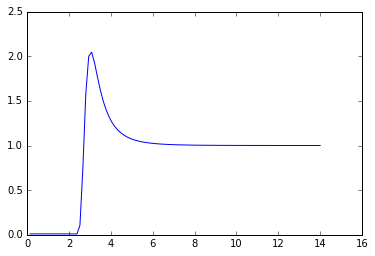

In [7]:
plt.plot(grid,res.x, label='Density')
# plt.plot(grid,v_ext, label='Potential')
plt.show()

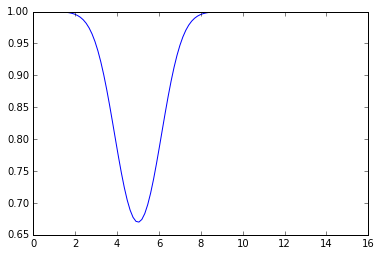

In [8]:
def v(x):
    # Gaussian
    mu = 5
    sigma = 1
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
# Vectorize allows analysis of function (v) at each point in an input array
v = np.vectorize(v)
v_ext = v(grid)

res = minimize(F_tot, rho, bounds=[(0.01,None)]*pts)

plt.plot(grid,res.x, label='Density')
# plt.plot(grid,v_ext, label='Potential')
plt.show()

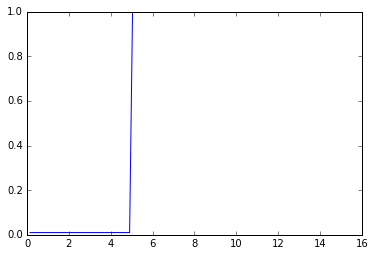

In [9]:
def v(x):
    # Hard wall at x = 5
    cutoff = 5
    if x<cutoff:
        y = 100
    else:
        y = 0 
    return y
# Vectorize allows analysis of function (v) at each point in an input array
v = np.vectorize(v)
v_ext = v(grid)

res = minimize(F_tot, rho, bounds=[(0.01,None)]*pts)

plt.plot(grid,res.x, label='Density')
# plt.plot(grid,v_ext, label='Potential')
plt.show()


$$\beta F^{1D}_{ex}[{\rho_i}]=\int dz  \Phi({n_{\alpha}})$$

$$n_{\alpha}(z) = \int dz' \rho_i(z') \omega^i_{\alpha}(z-z')$$

$$\omega^i_0(z)=\frac{1}{2}(\delta(z-R_i)+\delta(z+R_i))$$

$$\omega^i_1(z)=\Theta(R_i-|z|)$$

$$\Phi({n_\alpha})=-n_0 ln(1-n_1)$$

$$n_0(x)=\int dz' \rho_i(z') \frac{1}{2}(\delta(z-z'-R_i)+\delta(z-z'+R_i))$$

$$n_0(x)=\frac{1}{2}\rho(x+R)+\frac{1}{2}\rho(x-R)$$

$$n_1(x)=\int_{x-R}^{x+R} \rho(x') dx'$$

$$\beta F=\sum_x \delta x \Phi(x)$$

In [1]:
def v(x):
    # Hard wall at x = 5
    cutoff = 2
    if x<cutoff:
        y = 100
    elif x>(gridmax-cutoff):
        y = 100
    else:
        y = 0 
    return y
# Vectorize allows analysis of function (v) at each point in an input array
v = np.vectorize(v)
v_ext = v(grid)

# Ideal helmholtz free energy
def F_id(rho):
    return np.sum(rho*(np.log(rho)-1))*dx/Beta

# External Helmholtz free energy
def F_ext(rho):
    return np.sum(v_ext*rho)*dx

Radii = 100
def vector_n0(rho):
    conv_vector = np.zeros(2*Radii+1) #Convolution vector
    conv_vector[0] = 1
    conv_vector[-1] = 1
    n0 = 0.5*np.convolve(rho, conv_vector, mode='same')*dx
    return n0

def vector_n1(rho):
    conv_vector = np.ones(2*Radii+1) #Convolution vector
    n1 = np.convolve(rho, conv_vector, mode='same')*dx
#     np.clip(n1,-np.inf,0.99999999999999, out=n1)
    return n1

def F_1d(rho):
    n0 = vector_n0(rho)
    n1 = vector_n1(rho)
    y = -np.sum(n0*np.log(1-n1))*dx/Beta
    return y

# Total Helmholtz free energy
def F_tot(rho):
    return F_id(rho) + F_ext(rho) + F_1d(rho)
rho = np.zeros(pts) + 0.
res = minimize(F_tot, rho, bounds=[(0.001,None)]*pts)

plt.plot(grid,res.x, label='Density')


NameError: name 'np' is not defined

$$\frac{1}{L}\int_{-\infty}^{t}H(t^{'})\exp(-\frac{R}{L}(t-t^{'}))dt^{'}$$
$$\exp(-\frac{R}{L}t)H(t)$$

In [26]:
np.sum(res.x*dx)

0.013999999999999997